In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import TextVectorization
import re,string
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout,LayerNormalization

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dialogs.txt to dialogs.txt


In [ ]:
file_name = 'dialogs.txt'
# Read the uploaded CSV file into a DataFrame
df = pd.read_csv(file_name, sep='\t', names=['question', 'answer'])
print(f'Dataframe size: {len(df)}')
df.head()


Dataframe size: 3725


,question,answer
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.


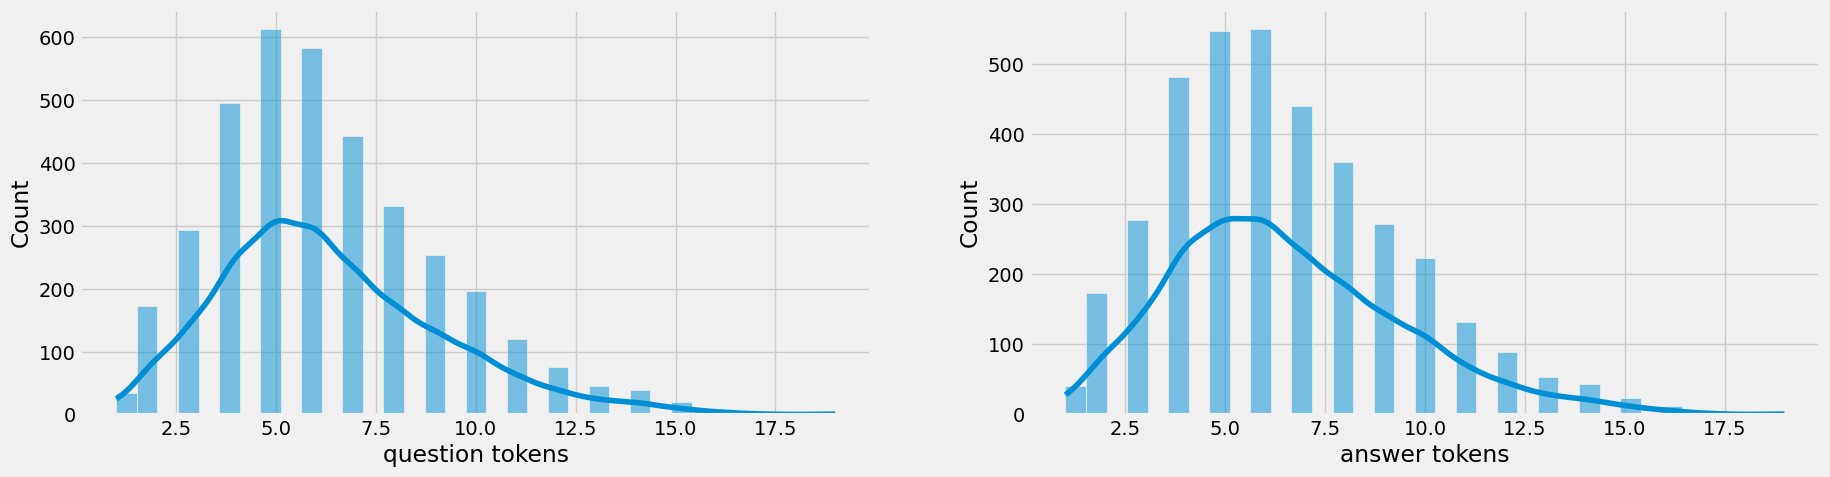

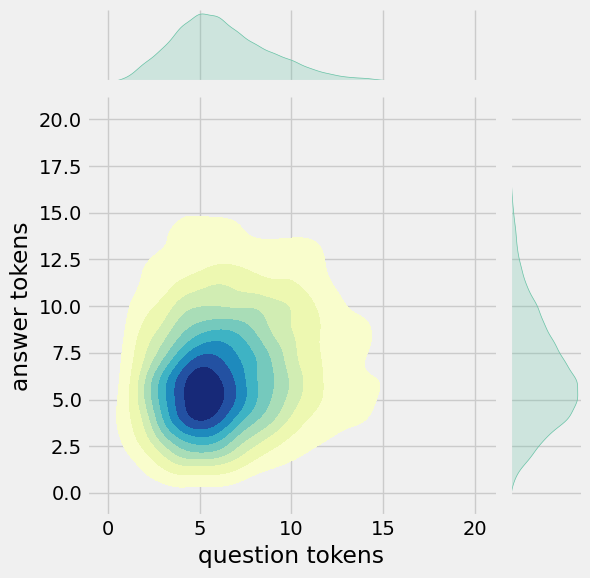

In [ ]:
df['question tokens']=df['question'].apply(lambda x:len(x.split()))
df['answer tokens']=df['answer'].apply(lambda x:len(x.split()))
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.set_palette('Set2')
sns.histplot(x=df['question tokens'],data=df,kde=True,ax=ax[0])
sns.histplot(x=df['answer tokens'],data=df,kde=True,ax=ax[1])
sns.jointplot(x='question tokens',y='answer tokens',data=df,kind='kde',fill=True,cmap='YlGnBu')
plt.show()

In [ ]:
def clean_text(text):
    text=re.sub('-',' ',text.lower())
    text=re.sub('[.]',' . ',text)
    text=re.sub('[1]',' 1 ',text)
    text=re.sub('[2]',' 2 ',text)
    text=re.sub('[3]',' 3 ',text)
    text=re.sub('[4]',' 4 ',text)
    text=re.sub('[5]',' 5 ',text)
    text=re.sub('[6]',' 6 ',text)
    text=re.sub('[7]',' 7 ',text)
    text=re.sub('[8]',' 8 ',text)
    text=re.sub('[9]',' 9 ',text)
    text=re.sub('[0]',' 0 ',text)
    text=re.sub('[,]',' , ',text)
    text=re.sub('[?]',' ? ',text)
    text=re.sub('[!]',' ! ',text)
    text=re.sub('[$]',' $ ',text)
    text=re.sub('[&]',' & ',text)
    text=re.sub('[/]',' / ',text)
    text=re.sub('[:]',' : ',text)
    text=re.sub('[;]',' ; ',text)
    text=re.sub('[*]',' * ',text)
    text=re.sub('[\']',' \' ',text)
    text=re.sub('[\"]',' \" ',text)
    text=re.sub('\t',' ',text)
    return text

df.drop(columns=['answer tokens','question tokens'],axis=1,inplace=True)
df['encoder_inputs']=df['question'].apply(clean_text)
df['decoder_targets']=df['answer'].apply(clean_text)+' <end>'
df['decoder_inputs']='<start> '+df['answer'].apply(clean_text)+' <end>'

df.head(10)


,question,answer,encoder_inputs,decoder_targets,decoder_inputs
0,"hi, how are you doing?",i'm fine. how about yourself?,"hi , how are you doing ?",i ' m fine . how about yourself ? <end>,<start> i ' m fine . how about yourself ? <end>
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,i ' m fine . how about yourself ?,i ' m pretty good . thanks for asking . <end>,<start> i ' m pretty good . thanks for asking...
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,i ' m pretty good . thanks for asking .,no problem . so how have you been ? <end>,<start> no problem . so how have you been ? ...
3,no problem. so how have you been?,i've been great. what about you?,no problem . so how have you been ?,i ' ve been great . what about you ? <end>,<start> i ' ve been great . what about you ? ...
4,i've been great. what about you?,i've been good. i'm in school right now.,i ' ve been great . what about you ?,i ' ve been good . i ' m in school right now ...,<start> i ' ve been good . i ' m in school ri...
5,i've been good. i'm in school right now.,what school do you go to?,i ' ve been good . i ' m in school right now .,what school do you go to ? <end>,<start> what school do you go to ? <end>
6,what school do you go to?,i go to pcc.,what school do you go to ?,i go to pcc . <end>,<start> i go to pcc . <end>
7,i go to pcc.,do you like it there?,i go to pcc .,do you like it there ? <end>,<start> do you like it there ? <end>
8,do you like it there?,it's okay. it's a really big campus.,do you like it there ?,it ' s okay . it ' s a really big campus . <...,<start> it ' s okay . it ' s a really big cam...
9,it's okay. it's a really big campus.,good luck with school.,it ' s okay . it ' s a really big campus .,good luck with school . <end>,<start> good luck with school . <end>


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


dialogs = {
    'txt': [
        "This is the first document.",
        "This document is the second document.",
        "And this is the third one.",
        "Is this the first document?",
    ]
}


tfidf_vectorizer = TfidfVectorizer(
    max_df=0.8,
    min_df=2,
    stop_words='english',
    use_idf=True
)


tfidf_matrix = tfidf_vectorizer.fit_transform(dialogs['txt'])


tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


print(tfidf_df)


   document
0       1.0
1       1.0
2       0.0
3       1.0


In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Sample text data
dialogs = {
    'txt': [
        "This is the first document.",
        "This document is the second document.",
        "And this is the third one.",
        "Is this the first document?",
    ]
}

# Initialize the TF-IDF vectorizer with optional parameters
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.8,  # Ignore terms that appear in more than 80% of documents
    min_df=2,    # Ignore terms that appear in fewer than 2 documents
    stop_words='english',  # Remove common English stop words
    use_idf=True  # Enable IDF (Inverse Document Frequency) weighting
)

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(dialogs['txt'])

# Convert the TF-IDF matrix to a pandas DataFrame (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Now, tfidf_df contains the TF-IDF features for your text data
# You can use tfidf_df as input features for your machine learning models
print(tfidf_df)


   document
0       1.0
1       1.0
2       0.0
3       1.0


In [ ]:
import gensim
from nltk.tokenize import word_tokenize

# Replace 'your_dataset.txt' with the actual file path to your text file
file_path = 'dialogs.txt'

# Initialize an empty list to store the dialogs
dialogs = []

# Open the text file and read each line (assuming each line is a dialog)
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        dialogs.append(line.strip())  # Append each line as a dialog

# Tokenize the dialog sentences
tokenized_dialogs = [word_tokenize(dialog) for dialog in dialogs]

# Train a Word2Vec model on the tokenized dialogs
w2v_model = gensim.models.Word2Vec(sentences=tokenized_dialogs, vector_size=100, window=5, min_count=1, sg=0)

# You can replace the vector_size, window, min_count, and sg (skip-gram) parameters with values that suit your dataset and task.

# Example: Accessing the Word2Vec embeddings for a word
# Replace 'word_to_lookup' with an actual word from your dataset
word_to_lookup = 'how'

# Access the Word2Vec embeddings for the word
word_embedding = w2v_model.wv[word_to_lookup]

# Now, word_embedding contains the Word2Vec embedding for the specified word

# Now, word_embedding contains the Word2Vec embedding for 'word_to_lookup'

# You can use these word embeddings as features for your machine learning models.


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Create dummy data (replace this with your actual data)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

# XGBoost
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)
xgb_predictions = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy}")

# Stacking
base_models = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgboost', xgb.XGBClassifier(n_estimators=100, random_state=42)),
]

stacking_classifier = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
)

stacking_classifier.fit(X_train, y_train)
stacking_predictions = stacking_classifier.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print(f"Stacking Accuracy: {stacking_accuracy}")


Random Forest Accuracy: 0.9
XGBoost Accuracy: 0.895
Stacking Accuracy: 0.905


In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.4 MB/s eta 0:00:00


In [ ]:
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 93.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.7 MB/s eta 0:00:00


In [ ]:
from torch.utils.data import DataLoader

batch_size = 32  # Adjust as needed
shuffle = True   # You can set this to True if you want to shuffle the data during training

dataloader = DataLoader(dialogs, batch_size=32, shuffle=True)


In [ ]:
# Example: Instantiate the custom dataset
dataset = dialogs(texts='hi', labels=, tokenizer=tokenizer, max_length=max_seq_length)


In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.3 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import GPT2Tokenizer
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=self.max_length,
            return_tensors="pt"
        )

        return {
            "input_ids": encoding["input_ids"].squeeze(),
            "attention_mask": encoding["attention_mask"].squeeze(),
            "label": torch.tensor(label)
        }

# Example dataset (replace with your actual data)
your_text_data = [
    "This is the first text sequence.",
    "Here's the second one.",
    "And this is the third.",
]

your_labels = [0, 1, 0]  # Example labels (replace with your actual labels)

# Initialize a tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Define the maximum sequence length
max_seq_length = 64  # Adjust according to your task

# Create a custom dataset instance
dataset = CustomDataset(texts=your_text_data, labels=your_labels, tokenizer=tokenizer, max_length=max_seq_length)


In [ ]:
!pip install accelerate>=0.20.1


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dialogs.txt to dialogs (1).txt


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Load the dataset from the text file
file_path = "dialogs.txt"  # Replace with the actual path to your text file
with open(file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

# Split dialogues and labels
dialogues = []
labels = []
for line in lines:
    parts = line.strip().split("\t")
    if len(parts) == 2:
        dialogue, label = parts
        dialogues.append(dialogue)
        labels.append(label)

# Tokenize the dialogues
max_words = 10000  # Adjust based on your dataset size
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(dialogues)

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(dialogues)

# Pad sequences for consistent input size
max_sequence_length = 50  # Adjust as needed
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding="post", truncating="post")

# Convert labels to numeric format
y = np.array([1 if label == "positive" else 0 for label in labels])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

# Build the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
batch_size = 64
epochs = 10  # Adjust as needed
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")


Epoch 1/10
47/47 [==============================] - 11s 177ms/step - loss: 0.0908 - accuracy: 0.9785 - val_loss: 4.1175e-05 - val_accuracy: 1.0000
Epoch 2/10
47/47 [==============================] - 8s 168ms/step - loss: 3.2037e-05 - accuracy: 1.0000 - val_loss: 2.6859e-05 - val_accuracy: 1.0000
Epoch 3/10
47/47 [==============================] - 7s 152ms/step - loss: 2.4055e-05 - accuracy: 1.0000 - val_loss: 2.1411e-05 - val_accuracy: 1.0000
Epoch 4/10
47/47 [==============================] - 8s 171ms/step - loss: 1.9298e-05 - accuracy: 1.0000 - val_loss: 1.7173e-05 - val_accuracy: 1.0000
Epoch 5/10
47/47 [==============================] - 7s 148ms/step - loss: 1.5486e-05 - accuracy: 1.0000 - val_loss: 1.3932e-05 - val_accuracy: 1.0000
Epoch 6/10
47/47 [==============================] - 8s 171ms/step - loss: 1.2817e-05 - accuracy: 1.0000 - val_loss: 1.1765e-05 - val_accuracy: 1.0000
Epoch 7/10
47/47 [==============================] - 7s 160ms/step - loss: 1.0967e-05 - accuracy: 1.0000

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset from the text file
file_path = "dialogs.txt"  # Replace with the actual path to your text file
with open(file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

# Split dialogues and labels
dialogues = []
labels = []
for line in lines:
    parts = line.strip().split("\t")
    if len(parts) == 2:
        dialogue, label = parts
        dialogues.append(dialogue)
        labels.append(label)

# Use LabelEncoder to convert labels to integers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Tokenize the dialogues
max_words = 10000  # Adjust based on your dataset size
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(dialogues)

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(dialogues)

# Pad sequences for consistent input size
max_sequence_length = 50  # Adjust as needed
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding="post", truncating="post")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels_encoded, test_size=0.2, random_state=42)

# Determine the number of unique classes for the output layer
num_classes = len(label_encoder.classes_)

# Build the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(num_classes, activation="softmax")  # Use softmax for multi-class classification
])

# Compile the model for multi-class classification
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
batch_size = 64
epochs = 10  # Adjust as needed
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")


Epoch 1/10
47/47 [==============================] - 10s 163ms/step - loss: 8.1628 - accuracy: 0.0000e+00 - val_loss: 8.1442 - val_accuracy: 0.0000e+00
Epoch 2/10
47/47 [==============================] - 7s 146ms/step - loss: 8.1738 - accuracy: 3.3557e-04 - val_loss: 8.1311 - val_accuracy: 0.0000e+00
Epoch 3/10
47/47 [==============================] - 6s 132ms/step - loss: 8.1354 - accuracy: 0.0027 - val_loss: 8.2880 - val_accuracy: 0.0054
Epoch 4/10
47/47 [==============================] - 7s 155ms/step - loss: 8.0790 - accuracy: 0.0050 - val_loss: 9.4728 - val_accuracy: 0.0067
Epoch 5/10
47/47 [==============================] - 6s 129ms/step - loss: 8.0411 - accuracy: 0.0057 - val_loss: 9.3973 - val_accuracy: 0.0067
Epoch 6/10
47/47 [==============================] - 7s 148ms/step - loss: 8.0009 - accuracy: 0.0057 - val_loss: 10.0635 - val_accuracy: 0.0067
Epoch 7/10
47/47 [==============================] - 6s 129ms/step - loss: 7.9854 - accuracy: 0.0057 - val_loss: 10.2722 - val_accu